In [27]:
from __future__ import annotations

import pandas as pd

from clovars.abstract import CellNode
from clovars.IO import SimulationLoader
from clovars.simulation import SimulationViewer

In [28]:
loader = SimulationLoader(settings={
    'simulation_input_folder': '/home/juliano/Repos/phd/clovars/scripts/batch_run_analysis/output',
    'cell_csv_file_name': 'cell_output_0.00.csv',
    'colony_csv_file_name': 'colony_output_0.00.csv',
    'parameters_file_name': 'params_0.00.json',
})
df = loader.cell_data

In [29]:
def yield_roots(cell_data: df):
    """Returns the root CellNodes of each tree, parsed from the cell_data DataFrame."""
    for root_name, root_data in cell_data.groupby('branch_name', sort=False):
        root_node = get_root_data(
            root_name=root_name, 
            root_data=root_data,
        )
        yield root_node


def get_root_data(
        root_name: str,
        root_data: pd.DataFrame,
) -> CellNode:
    """
    Builds the entire CellNode tree of a given colony name and returns its root Node.
    Raises ValueError if the given root_name is not present in the DataFrame.
    """
    if root_name not in root_data['name'].values:
        raise ValueError(f'Root name {root_name} not present in the "Name" column!')
    groups = root_data.sort_values(by=['simulation_seconds']).groupby('name')
    root_node = build_tree(
        root_name=root_name,
        groups=groups,
    )
    return root_node


def build_tree(
        root_name: str,
        groups: pd.DataFrameGroupBy,
        node: CellNode | None = None,
) -> CellNode:
    """Recursively builds the CellNode tree from the groups DataFrameGroupBy."""
    try:
        data = groups.get_group(root_name)
    except KeyError:  # Stop condition
        return node
    current_node = node
    for i, data in data.iterrows():
        next_node = CellNode(name=root_name)
        next_node.add_features(**data.to_dict())
        try:
            current_node.add_child(next_node)  # noqa
        except AttributeError:  # current_node is None
            node = next_node  # next_node is actually the root Node
        current_node = next_node
    build_tree(root_name=root_name + '.1', groups=groups, node=current_node)
    build_tree(root_name=root_name + '.2', groups=groups, node=current_node)
    return node


roots = list(yield_roots(cell_data=df))

Displaying Cell Trees as a 2D plot...
Displaying colony: 1a-1


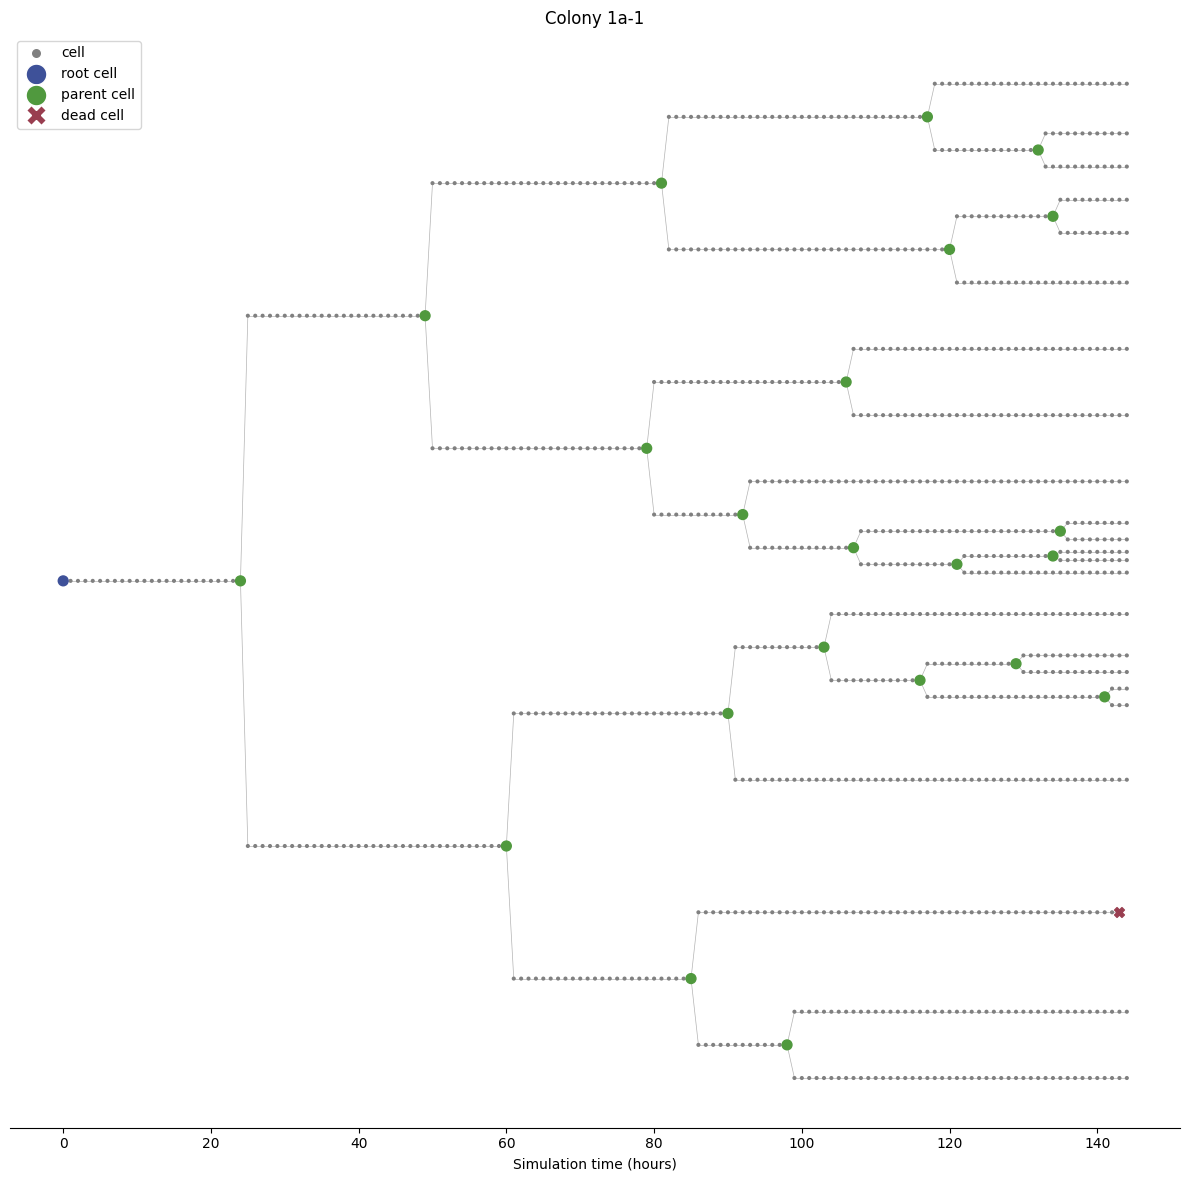

Displaying colony: 1b-1


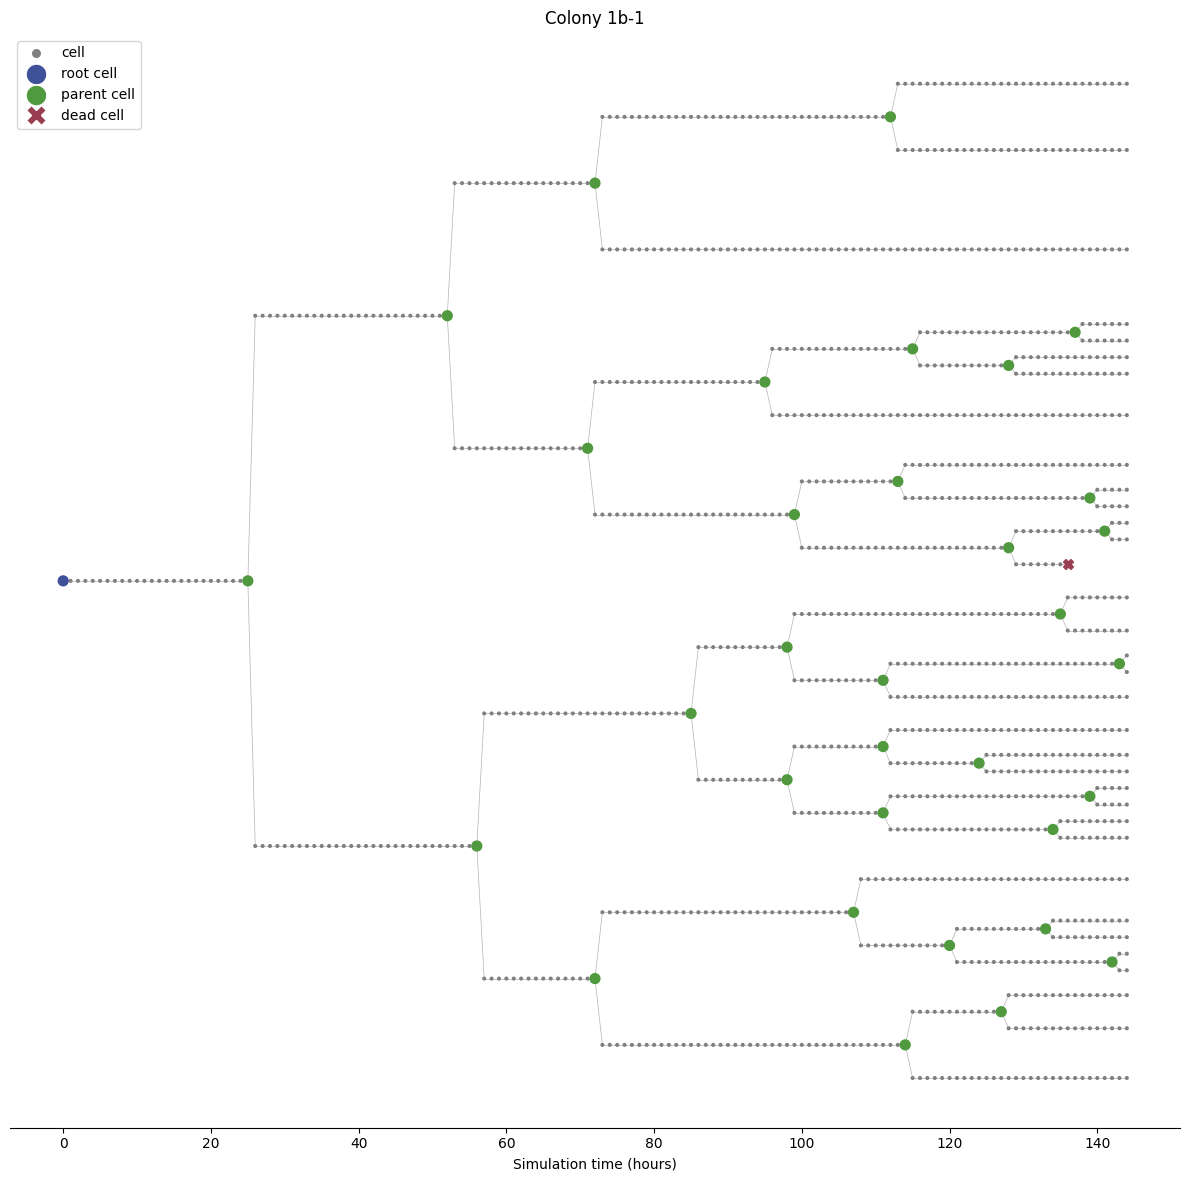

Displaying colony: 1c-1


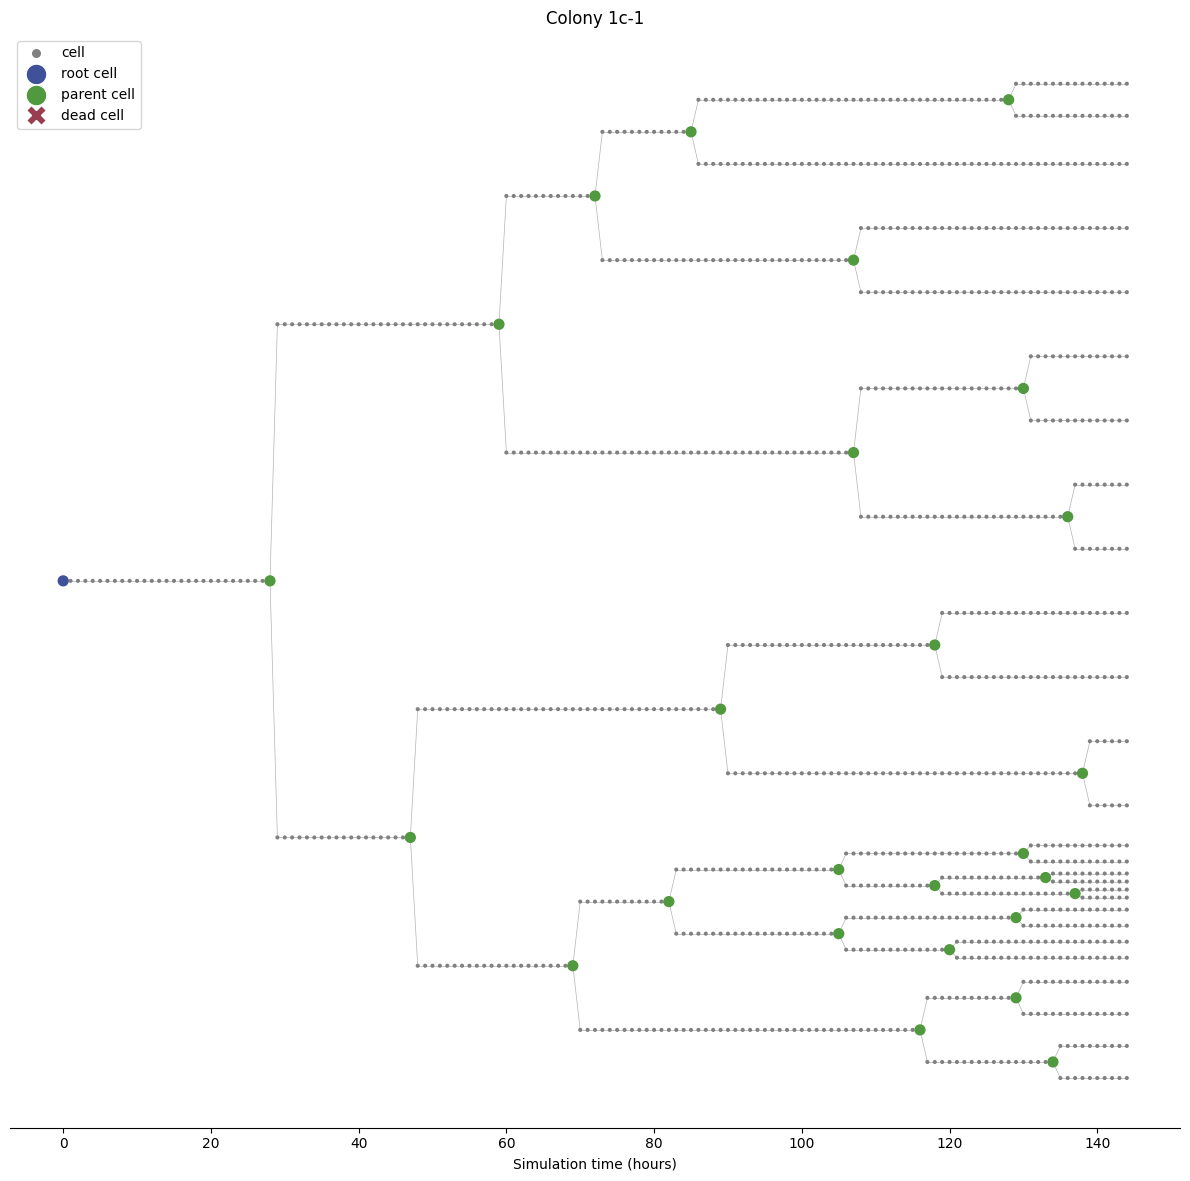

Displaying colony: 1d-1


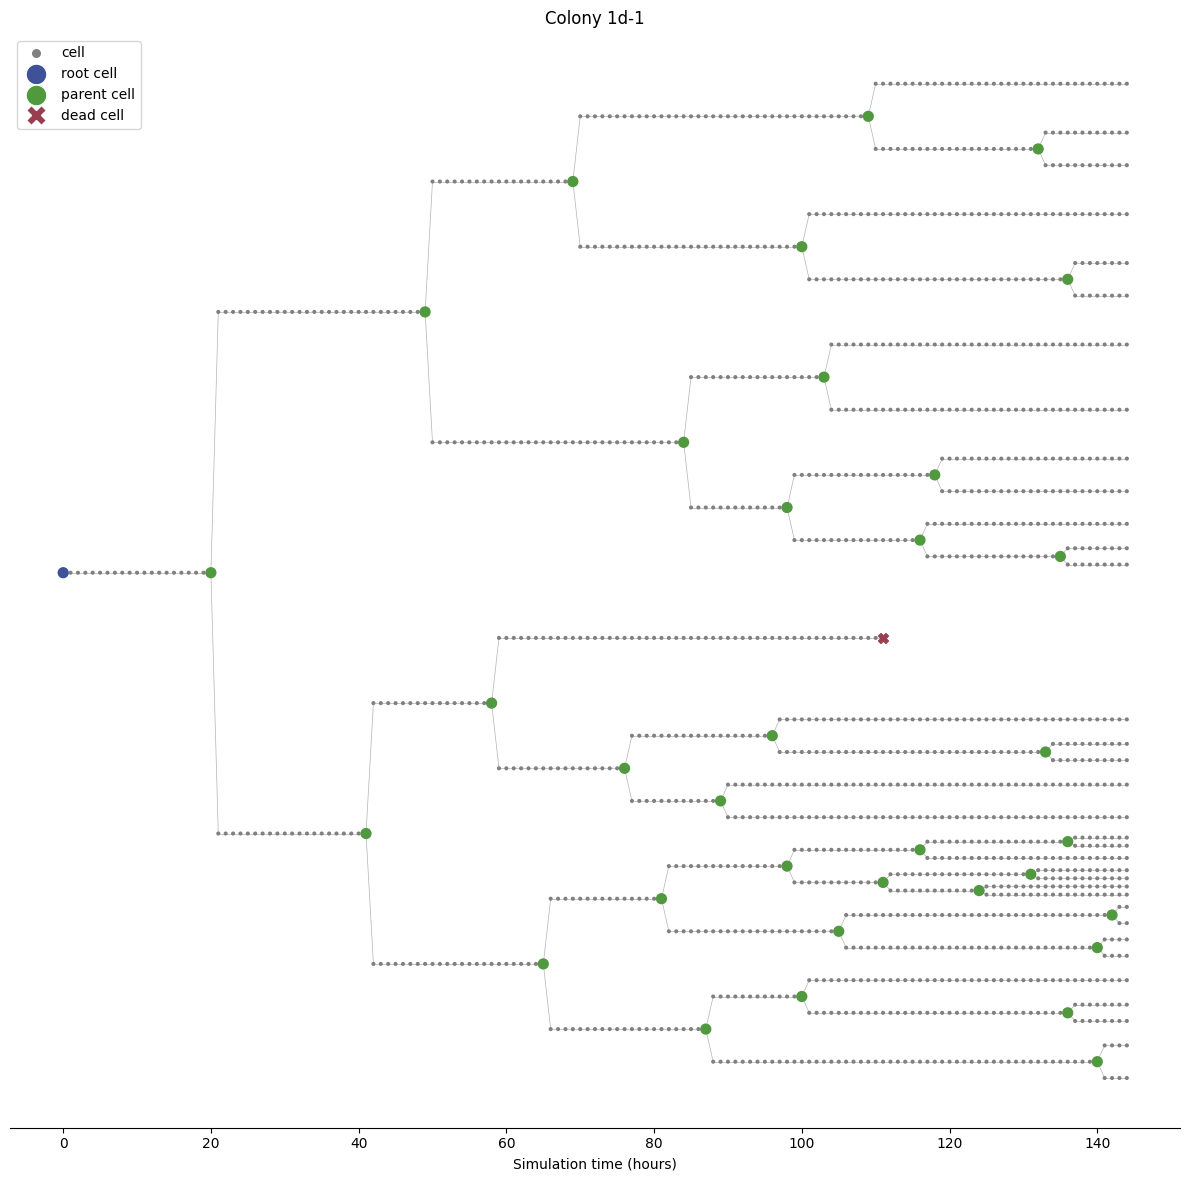

Displaying colony: 1e-1


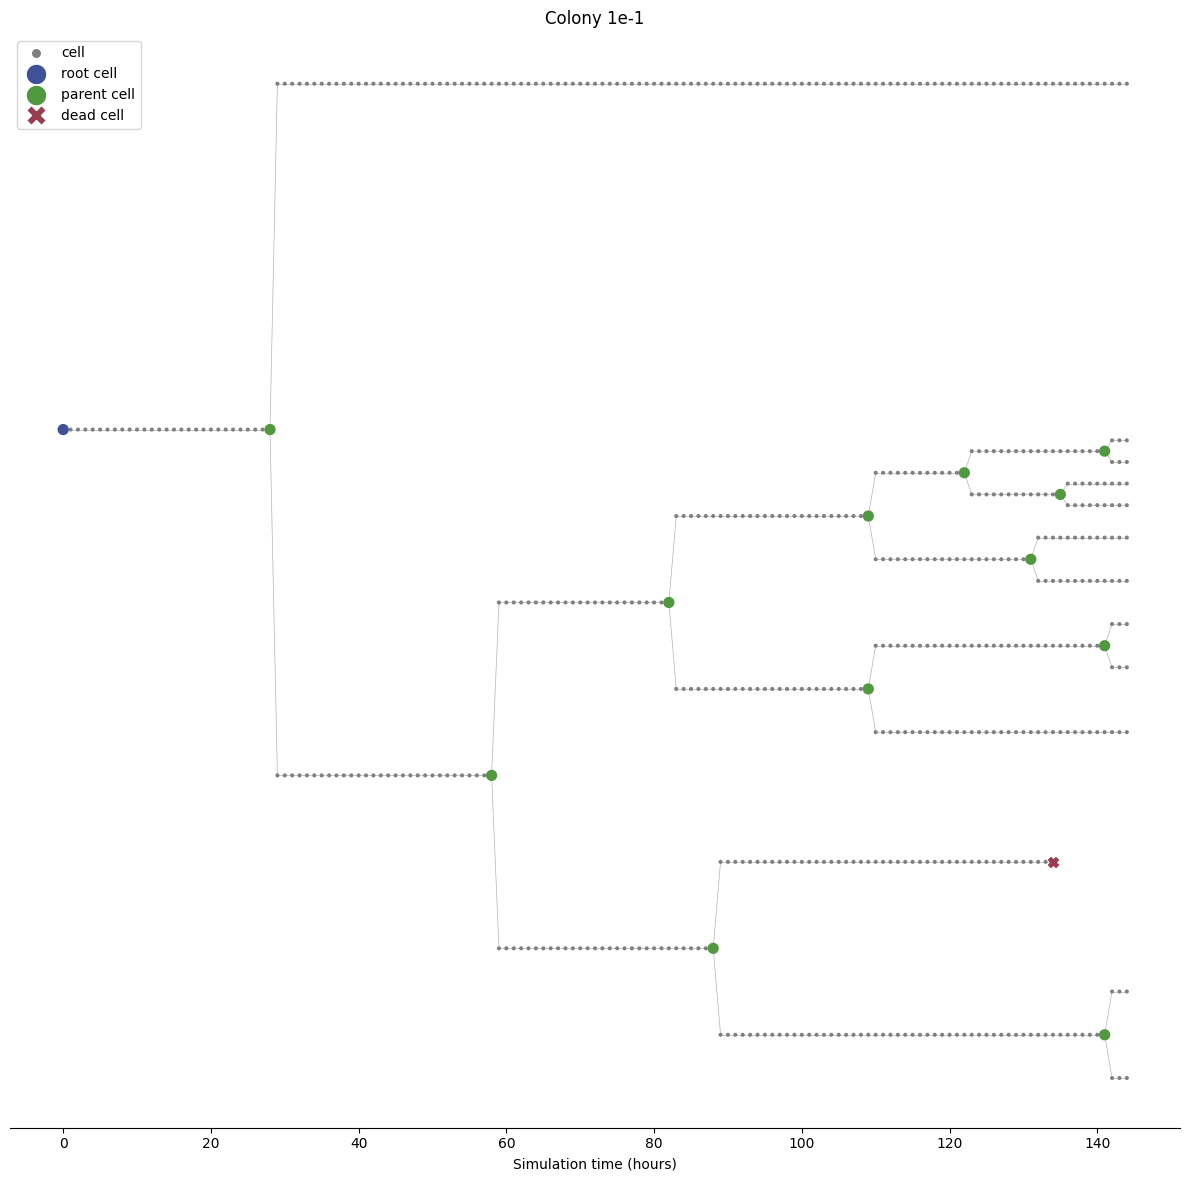

Displaying colony: 1f-1


KeyboardInterrupt: 

In [35]:
viewer.generate_output({'display_2D': True})